
# Classification Evaluation Metrics


In [1]:

#fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one/code/Users/karan.bhatti'
fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti'

import sys
print(sys.path)
print()
#sys.path.append(f'{fileloc}')
print()
#print(sys.path)


['/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti', '/anaconda/envs/azureml_py38/lib/python38.zip', '/anaconda/envs/azureml_py38/lib/python3.8', '/anaconda/envs/azureml_py38/lib/python3.8/lib-dynload', '', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/_project/vendor', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/automl/core/_vendor']




In [2]:

class Data(object):
    pass

df = Data
summ = Data


In [3]:
import helpdesk as hd

In [4]:
# Import writer class from csv module
from csv import writer

import pandas as pd, numpy as np
from datetime import datetime

import random, time


In [5]:

DEBUG = True
seed = 1919


In [6]:

pd.set_option('display.max_rows', 50);
pd.set_option('display.max_columns', 50);
pd.set_option('display.width', 200);


In [7]:
#%run "C040_MDL_NN w TensorFlow.ipynb"

In [8]:

#mid = 27823768
mid = 27825824


In [9]:

#preds_dataset_name = 'predictions_dataset_2022-10-18.csv'
#preds_dataset_name = 'predictions_dataset_2022-10-27.csv'
preds_dataset_name = f'predictions_dataset_{mid}_2022-11-27.csv'

df_eval_raw = pd.read_csv(f'{fileloc}/{preds_dataset_name}')

print(df_eval_raw.shape)
print()
print(df_eval_raw.columns.values.tolist())


(536782, 94)

['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'Winner_actual', 'Top3_actual', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'y_pos', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1', 'RaceName', 'dist300', 'dist350', 'dist400', 'dist450', 'dist500', 'dist600', 'dist700', 'xr_races', 'xr_wins', 'xr_wins_pct', 'xr_fin_t2', 'xr_fin_t2_pct', 'xr_fin_plc', 'xr_fin_plc_pct', 'xr_races_norm', 'x_speed_prev_norm', 'x_speed_avg_norm', 'x_speed_min_norm', 'x_speed_max_norm', 'x_speed_range_norm', 'x_rt

In [10]:
# Plotting the RaceGrade

In [11]:

print(pd.DataFrame(df_eval_raw.isna().sum()).transpose())


   @id_DOG  DogName  y_runtime  RaceId  @id_RACE  Distance  RaceGrade  Track  Event_Dt  ft_sp  x_num_dogs  position  y_margin  Winner_actual  Top3_actual  position_random  Winner_random  \
0        0        0          0       0         0         0          0      0         0      0           0         0         0              0            0                0              0   

   Top3_random  position_fasttrack  Winner_fastrack  Top3_fastrack  y_pos  x_races_tot  x_dist_gp  x_runtm_gp  ...  x_speed_prev_norm  x_speed_avg_norm  x_speed_min_norm  x_speed_max_norm  \
0            0                   0                0              0      0            0          0           0  ...                  0                 0                 0                 0   

   x_speed_range_norm  x_rtgp_prev_norm  x_rtgp_avg_norm  x_rtgp_min_norm  x_rtgp_max_norm  x_rtgp_range_norm  xr_wins_norm  xr_wins_pct_norm  xr_fin_t2_norm  xr_fin_t2_pct_norm  xr_fin_plc_norm  \
0                   0                 0 

In [12]:

df_eval_raw.describe()


,@id_DOG,y_runtime,RaceId,@id_RACE,ft_sp,x_num_dogs,position,y_margin,Winner_actual,Top3_actual,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,y_pos,x_races_tot,x_dist_gp,x_runtm_gp,x_rtgp_prev,x_rtgp_avg,x_rtgp_min,x_rtgp_max,x_rtgp_range,...,xr_races_norm,x_speed_prev_norm,x_speed_avg_norm,x_speed_min_norm,x_speed_max_norm,x_speed_range_norm,x_rtgp_prev_norm,x_rtgp_avg_norm,x_rtgp_min_norm,x_rtgp_max_norm,x_rtgp_range_norm,xr_wins_norm,xr_wins_pct_norm,xr_fin_t2_norm,xr_fin_t2_pct_norm,xr_fin_plc_norm,xr_fin_plc_pct_norm,yearqtr,x_track,x_racegrade,x_track_norm,x_racegrade_norm,y_pos_inv,preds,mid
count,5.367820e+05,536782.000000,5.367820e+05,5.367820e+05,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,...,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.0
mean,4.526384e+08,24.401001,7.292602e+08,7.292602e+08,16.991305,7.336054,4.166000,6.029310,0.139014,0.416661,4.168027,0.138749,0.416247,4.028419,0.144332,0.434445,4.166000,17.441984,415.650767,24.331163,24.057037,24.026348,23.691691,24.470661,0.778971,...,2.515046e-19,3.248339e-17,-7.809051e-18,4.166082e-17,1.452013e-16,2.796954e-18,1.036918e-16,-1.403604e-07,-8.620247e-18,-2.412997e-17,1.349355e-18,1.010775e-18,7.745141e-18,2.868103e-18,9.520564e-18,1.617199e-18,8.825618e-18,202144.990687,1414.797365,5202.905636,-0.021339,0.012383,-4.166000,5.133843,27825824.0
std,1.120535e+08,4.949724,5.833205e+07,5.833205e+07,21.039273,0.896384,2.160989,5.037514,0.345961,0.493006,2.160860,0.345685,0.492936,2.089659,0.351427,0.495684,2.160989,15.125087,77.953580,4.640764,5.226176,4.902033,4.862822,4.974698,0.694263,...,9.244689e-01,9.248195e-01,9.248195e-01,9.248195e-01,9.248195e-01,9.245404e-01,9.186510e-01,9.219739e-01,9.219667e-01,9.219667e-01,9.171582e-01,8.466958e-01,8.537775e-01,9.181651e-01,9.182514e-01,9.210287e-01,9.210772e-01,49.216498,679.633749,5252.138193,1.007620,1.004246,2.160989,1.668147,0.0
min,1.083910e+08,10.000000,6.238619e+08,6.238619e+08,0.260000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,300.000000,9.950249,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.474874e+00,-2.474803e+00,-2.474828e+00,-2.474788e+00,-2.474848e+00,-2.474874e+00,-2.461040e+00,-2.474590e+00,-2.473946e+00,-2.473594e+00,-2.441584e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,202101.000000,0.000000,0.000000,-2.118907,-0.982450,-8.000000,0.053623,27825824.0
25%,3.836043e+08,20.540000,6.801957e+08,6.801957e+08,4.200000,7.000000,2.000000,1.990000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,5.000000,350.000000,20.735650,20.619335,20.664857,20.404899,21.095455,0.351852,...,-7.128324e-01,-6.641927e-01,-6.718327e-01,-6.229789e-01,-6.772973e-01,-6.784502e-01,-6.288299e-01,-6.129837e-01,-6.165367e-01,-6.233181e-01,-6.392977e-01,-5.855400e-01,-5.976143e-01,-6.822210e-01,-6.638927e-01,-7.001945e-01,-6.822210e-01,202102.000000,711.000000,860.000000,-1.064784,-0.818012,-6.000000,3.880550,27825824.0
50%,4.517679e+08,23.530000,7.290297e+08,7.290297e+08,8.800000,8.000000,4.000000,5.250000,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000,14.000000,400.000000,23.700000,23.659794,23.592500,23.250302,24.111392,0.729114,...,-1.026751e-01,1.042167e-01,5.992582e-02,1.635671e-01,4.893348e-02,-1.132179e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+

In [13]:

df_eval_raw.head()


,@id_DOG,DogName,y_runtime,RaceId,@id_RACE,Distance,RaceGrade,Track,Event_Dt,ft_sp,x_num_dogs,position,y_margin,Winner_actual,Top3_actual,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,y_pos,x_races_tot,x_dist_gp,x_runtm_gp,...,x_speed_prev_norm,x_speed_avg_norm,x_speed_min_norm,x_speed_max_norm,x_speed_range_norm,x_rtgp_prev_norm,x_rtgp_avg_norm,x_rtgp_min_norm,x_rtgp_max_norm,x_rtgp_range_norm,xr_wins_norm,xr_wins_pct_norm,xr_fin_t2_norm,xr_fin_t2_pct_norm,xr_fin_plc_norm,xr_fin_plc_pct_norm,yearqtr,ttflag,x_track,x_racegrade,x_track_norm,x_racegrade_norm,y_pos_inv,preds,mid
0,108390981,DOLLY DOES IT,26.43,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,11.0,8,4,6.00,0,0,3.0,0,1,5.0,0,0,4,0,450,26.313053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202101,Train,626.0,4805.0,-1.190804,-0.0637,-4,5.320853,27825824
1,262316194,GO BEZZA,26.87,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,31.0,8,8,12.25,0,0,1.0,1,1,7.0,0,0,8,0,450,26.751106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202101,Train,626.0,4805.0,-1.190804,-0.0637,-8,5.320853,27825824
2,285758880,LITTLE MIA,26.81,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,21.0,8,7,11.50,0,0,6.0,0,0,6.0,0,0,7,0,450,26.691372,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202101,Train,626.0,4805.0,-1.190804,-0.0637,-7,5.320853,27825824
3,296096035,MY NAMES SERG,26.13,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,3.8,8,2,1.75,0,1,5.0,0,0,2.0,0,1,2,0,450,26.014381,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202101,Train,626.0,4805.0,-1.190804,-0.0637,-2,5.320853,27825824
4,327377954,WYNBURN BABE,26.01,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,3.0,8,1,0.00,1,1,7.0,0,0,1.0,1,1,1,0,450,25.894912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202101,Train,626.0,4805.0,-1.190804,-0.0637,-1,5.320853,27825824


In [14]:

df_evaluation = df_eval_raw.copy()


In [15]:

# groupings
groupings = ['@id_RACE']

## Rank for Place Preds
#df_evaluation["position_preds"] = df_evaluation.groupby( groupings )["preds"].rank("dense", ascending=False)
df_evaluation["position_preds"] = df_evaluation.groupby( groupings )["preds"].rank("dense", ascending=True)

# Winner / Place Preds Columns
df_evaluation['Winner_preds'] = df_evaluation.apply(lambda x : 1 if x.position_preds <= 1 else 0, axis = 1)
df_evaluation['Top3_preds'] = df_evaluation.apply(lambda x : 1 if x.position_preds <= 3 else 0, axis = 1)

print(datetime.now())


2022-11-27 11:52:42.947779


In [16]:

df_poscount = df_evaluation.groupby(groupings).agg({'position_preds':'nunique'}).reset_index().rename(columns= {'position_preds':'poscount'})


In [17]:

df_eval_v2 = df_evaluation.merge(df_poscount, on = groupings, how = 'left')

df_eval_v2['preds_tie'] = df_eval_v2.apply(lambda x : 0 if x.x_num_dogs == x.poscount \
                                           else 1 if x.x_num_dogs == x.poscount + 1 \
                                           else 2 if x.x_num_dogs == x.poscount + 2 \
                                           else 3 if x.x_num_dogs == x.poscount + 3 \
                                           else 4 if x.x_num_dogs == x.poscount + 4 \
                                           else 5 if x.x_num_dogs == x.poscount + 5 \
                                           else 6 if x.x_num_dogs == x.poscount + 6 \
                                           else 7 if x.x_num_dogs == x.poscount + 7 \
                                           else 8 if x.x_num_dogs == x.poscount + 8 else 99, axis = 1)

print()

print(df_eval_v2.shape)
print(df_eval_v2.columns.values.tolist())



(536782, 99)
['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'Winner_actual', 'Top3_actual', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'y_pos', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1', 'RaceName', 'dist300', 'dist350', 'dist400', 'dist450', 'dist500', 'dist600', 'dist700', 'xr_races', 'xr_wins', 'xr_wins_pct', 'xr_fin_t2', 'xr_fin_t2_pct', 'xr_fin_plc', 'xr_fin_plc_pct', 'xr_races_norm', 'x_speed_prev_norm', 'x_speed_avg_norm', 'x_speed_min_norm', 'x_speed_max_norm', 'x_speed_range_norm', 'x_rt

In [18]:

print()
print(df_eval_v2.groupby(['preds_tie']).agg({'@id_RACE':'nunique'}).reset_index())



   preds_tie  @id_RACE
0          0     68496
1          1      2735
2          2      1342
3          3       734
4          4       416
5          5       293
6          6       211
7          7       251


In [19]:

#df_evaluation[df_evaluation['@id_RACE'].isin([626271182])].head()
df_eval_v2[df_eval_v2['ttflag'].isin(['Test'])].head()


,@id_DOG,DogName,y_runtime,RaceId,@id_RACE,Distance,RaceGrade,Track,Event_Dt,ft_sp,x_num_dogs,position,y_margin,Winner_actual,Top3_actual,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,y_pos,x_races_tot,x_dist_gp,x_runtm_gp,...,x_rtgp_prev_norm,x_rtgp_avg_norm,x_rtgp_min_norm,x_rtgp_max_norm,x_rtgp_range_norm,xr_wins_norm,xr_wins_pct_norm,xr_fin_t2_norm,xr_fin_t2_pct_norm,xr_fin_plc_norm,xr_fin_plc_pct_norm,yearqtr,ttflag,x_track,x_racegrade,x_track_norm,x_racegrade_norm,y_pos_inv,preds,mid,position_preds,Winner_preds,Top3_preds,poscount,preds_tie
380449,135133731,SOUTHWOOD MIA,20.09,785800389,785800389,340m,Grade 5,Gunnedah,2022-05-26,101.0,7,5,9.50,0,0,4.0,0,0,6.0,0,0,5,26,350,20.680882,...,1.292526e+00,1.152953,1.172627,1.113885,-0.562347,-1.242118,-0.896727,-0.824163,-0.947488,-0.825640,-1.054576,202202,Test,505.0,13503.0,-1.370198,1.59942,-5,8.017915,27825824,7.0,0,0,7,0
380450,403092175,ONLY A WINNER,19.42,785800389,785800389,340m,Grade 5,Gunnedah,2022-05-26,4.8,7,1,0.00,1,1,5.0,0,0,2.0,0,1,1,30,350,19.991176,...,3.225041e-01,0.939173,0.879289,1.026715,1.701293,1.656157,0.181072,0.686803,0.181058,1.063805,0.637218,202202,Test,505.0,13503.0,-1.370198,1.59942,-1,3.789716,27825824,2.0,0,1,7,0
380451,415622087,LUNAR HALO,20.38,785800389,785800389,340m,Grade 5,Gunnedah,2022-05-26,81.0,7,7,13.75,0,0,1.0,1,1,5.0,0,0,7,32,350,20.979412,...,-5.715217e-01,-0.475255,-0.481381,-0.484671,-0.072994,-0.155265,-0.517813,0.000000,-0.384716,-0.158777,-0.511406,202202,Test,505.0,13503.0,-1.370198,1.59942,-7,4.952310,27825824,4.0,0,0,7,0
380452,448841009,RIVERINA IVY,19.84,785800389,785800389,340m,Grade 5,Gunnedah,2022-05-26,12.0,7,3,6.00,0,1,2.0,0,1,3.0,0,1,3,51,350,20.423529,...,-3.238185e-02,0.990447,1.034042,0.921193,-1.172767,0.931589,-0.421227,1.923048,0.217782,1.730668,0.247329,202202,Test,505.0,13503.0,-1.370198,1.59942,-3,4.902553,27825824,3.0,0,1,7,0
380453,521874669,MORAINE HALLIE,20.08,785800389,785800389,340m,Grade 5,Gunnedah,2022-05-26,61.0,7,4,9.25,0,0,3.0,0,1,4.0,0,0,4,15,350,20.670588,...,-8.165233e-15,-0.440866,-0.451856,-0.372273,0.848088,-0.155265,-0.088378,-0.549442,-0.443244,-0.492208,-0.367043,202202,Test,505.0,13503.0,-1.370198,1.59942,-4,5.698516,27825824,5.0,0,0,7,0


In [20]:

df_eval_v2.describe()


,@id_DOG,y_runtime,RaceId,@id_RACE,ft_sp,x_num_dogs,position,y_margin,Winner_actual,Top3_actual,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,y_pos,x_races_tot,x_dist_gp,x_runtm_gp,x_rtgp_prev,x_rtgp_avg,x_rtgp_min,x_rtgp_max,x_rtgp_range,...,x_speed_range_norm,x_rtgp_prev_norm,x_rtgp_avg_norm,x_rtgp_min_norm,x_rtgp_max_norm,x_rtgp_range_norm,xr_wins_norm,xr_wins_pct_norm,xr_fin_t2_norm,xr_fin_t2_pct_norm,xr_fin_plc_norm,xr_fin_plc_pct_norm,yearqtr,x_track,x_racegrade,x_track_norm,x_racegrade_norm,y_pos_inv,preds,mid,position_preds,Winner_preds,Top3_preds,poscount,preds_tie
count,5.367820e+05,536782.000000,5.367820e+05,5.367820e+05,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,...,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.0,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000
mean,4.526384e+08,24.401001,7.292602e+08,7.292602e+08,16.991305,7.336054,4.166000,6.029310,0.139014,0.416661,4.168027,0.138749,0.416247,4.028419,0.144332,0.434445,4.166000,17.441984,415.650767,24.331163,24.057037,24.026348,23.691691,24.470661,0.778971,...,2.796954e-18,1.036918e-16,-1.403604e-07,-8.620247e-18,-2.412997e-17,1.349355e-18,1.010775e-18,7.745141e-18,2.868103e-18,9.520564e-18,1.617199e-18,8.825618e-18,202144.990687,1414.797365,5202.905636,-0.021339,0.012383,-4.166000,5.133843,27825824.0,4.083868,0.145620,0.430929,7.147449,0.188605
std,1.120535e+08,4.949724,5.833205e+07,5.833205e+07,21.039273,0.896384,2.160989,5.037514,0.345961,0.493006,2.160860,0.345685,0.492936,2.089659,0.351427,0.495684,2.160989,15.125087,77.953580,4.640764,5.226176,4.902033,4.862822,4.974698,0.694263,...,9.245404e-01,9.186510e-01,9.219739e-01,9.219667e-01,9.219667e-01,9.171582e-01,8.466958e-01,8.537775e-01,9.181651e-01,9.182514e-01,9.210287e-01,9.210772e-01,49.216498,679.633749,5252.138193,1.007620,1.004246,2.160989,1.668147,0.0,2.144780,0.352725,0.495207,1.182155,0.799636
min,1.083910e+08,10.000000,6.238619e+08,6.238619e+08,0.260000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,300.000000,9.950249,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.474874e+00,-2.461040e+00,-2.474590e+00,-2.473946e+00,-2.473594e+00,-2.441584e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,202101.000000,0.000000,0.000000,-2.118907,-0.982450,-8.000000,0.053623,27825824.0,1.000000,0.000000,0.000000,1.000000,0.000000
25%,3.836043e+08,20.540000,6.801957e+08,6.801957e+08,4.200000,7.000000,2.000000,1.990000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,5.000000,350.000000,20.735650,20.619335,20.664857,20.404899,21.095455,0.351852,...,-6.784502e-01,-6.288299e-01,-6.129837e-01,-6.165367e-01,-6.233181e-01,-6.392977e-01,-5.855400e-01,-5.976143e-01,-6.822210e-01,-6.638927e-01,-7.001945e-01,-6.822210e-01,202102.000000,711.000000,860.000000,-1.064784,-0.818012,-6.000000,3.880550,27825824.0,2.000000,0.000000,0.000000,7.000000,0.000000
50%,4.517679e+08,23.530000,7.290297e+08,7.290297e+08,8.800000,8.000000,4.000000,5.250000,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000,14.000000,400.000000,23.700000,23.659794,23.592500,23.250302,24.111392,0.729114,...,-1.132179e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.609545e-01,-1.486299e-01,-1.497862e-01,-1.080518e-01,202104.000000,1436.000000,2949.000000,0.010096,-0.418580,-4.000000,5.142857,27825824.0,4.000000,0.000000,

In [21]:

df_eval_v2.sort_values(by = ['@id_RACE','position']).head()


,@id_DOG,DogName,y_runtime,RaceId,@id_RACE,Distance,RaceGrade,Track,Event_Dt,ft_sp,x_num_dogs,position,y_margin,Winner_actual,Top3_actual,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,y_pos,x_races_tot,x_dist_gp,x_runtm_gp,...,x_rtgp_prev_norm,x_rtgp_avg_norm,x_rtgp_min_norm,x_rtgp_max_norm,x_rtgp_range_norm,xr_wins_norm,xr_wins_pct_norm,xr_fin_t2_norm,xr_fin_t2_pct_norm,xr_fin_plc_norm,xr_fin_plc_pct_norm,yearqtr,ttflag,x_track,x_racegrade,x_track_norm,x_racegrade_norm,y_pos_inv,preds,mid,position_preds,Winner_preds,Top3_preds,poscount,preds_tie
180086,434274825,FERDINAND BOY,24.98,623861932,623861932,450m,Grade 5 Final,Ballarat,2021-01-01,4.2,8,1,0.00,1,1,2.0,0,1,3.0,0,1,1,0,450,24.98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202101,Train,1591.0,1271.0,0.239897,-0.739425,-1,5.320853,27825824,1.0,1,1,1,7
180082,380917315,BAD GUY,25.03,623861932,623861932,450m,Grade 5 Final,Ballarat,2021-01-01,5.9,8,2,0.80,0,1,1.0,1,1,4.0,0,0,2,0,450,25.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202101,Train,1591.0,1271.0,0.239897,-0.739425,-2,5.320853,27825824,1.0,1,1,1,7
180087,465017181,MASKED AVENGER,25.08,623861932,623861932,450m,Grade 5 Final,Ballarat,2021-01-01,3.2,8,3,1.54,0,1,5.0,0,0,1.0,1,1,3,0,450,25.08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202101,Train,1591.0,1271.0,0.239897,-0.739425,-3,5.320853,27825824,1.0,1,1,1,7
180080,318755759,ASTON CORINNA,25.32,623861932,623861932,450m,Grade 5 Final,Ballarat,2021-01-01,16.1,8,4,4.89,0,0,6.0,0,0,5.0,0,0,4,0,450,25.32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202101,Train,1591.0,1271.0,0.239897,-0.739425,-4,5.320853,27825824,1.0,1,1,1,7
180083,387031520,GYPSY ZELDA,25.45,623861932,623861932,450m,Grade 5 Final,Ballarat,2021-01-01,32.1,8,5,6.73,0,0,7.0,0,0,8.0,0,0,5,0,450,25.45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202101,Train,1591.0,1271.0,0.239897,-0.739425,-5,5.320853,27825824,1.0,1,1,1,7


In [22]:

pd.crosstab(df_eval_v2.position, df_eval_v2.position_preds)


position_preds,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
position,,,,,,,,
1,23489,15122,11581,8915,6855,4628,2651,1379
2,14605,14661,13051,10992,8666,6453,4054,2051
3,11111,12276,12481,11801,10604,8019,5403,2808
4,8979,10306,11544,12179,11657,9537,6533,3718
5,7322,9019,10367,11523,12718,11279,7743,4482
6,5992,7077,8475,9598,10903,12894,8997,5509
7,4147,4874,5928,6943,7731,8625,10934,6726
8,2521,2917,3470,4168,4763,5555,6488,8985


In [23]:

df_eval_v2.groupby( [ 'ttflag', 'Top3_actual', 'Top3_preds']).agg({'@id_DOG':'count'}).reset_index()


,ttflag,Top3_actual,Top3_preds,@id_DOG
0,Test,0,0,62424
1,Test,0,1,28849
2,Test,1,0,27849
3,Test,1,1,37211
4,Train,0,0,147764
5,Train,0,1,74089
6,Train,1,0,67430
7,Train,1,1,91166


In [24]:

pd.crosstab(df_eval_v2.Top3_actual, df_eval_v2.Top3_preds, normalize='all')


Top3_preds,0,1
Top3_actual,,
0,0.391571,0.191769
1,0.177500,0.239160


In [25]:

df_eval_v2.tail(10)


,@id_DOG,DogName,y_runtime,RaceId,@id_RACE,Distance,RaceGrade,Track,Event_Dt,ft_sp,x_num_dogs,position,y_margin,Winner_actual,Top3_actual,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,y_pos,x_races_tot,x_dist_gp,x_runtm_gp,...,x_rtgp_prev_norm,x_rtgp_avg_norm,x_rtgp_min_norm,x_rtgp_max_norm,x_rtgp_range_norm,xr_wins_norm,xr_wins_pct_norm,xr_fin_t2_norm,xr_fin_t2_pct_norm,xr_fin_plc_norm,xr_fin_plc_pct_norm,yearqtr,ttflag,x_track,x_racegrade,x_track_norm,x_racegrade_norm,y_pos_inv,preds,mid,position_preds,Winner_preds,Top3_preds,poscount,preds_tie
536772,667648731,LITTLE FRANKY,23.87,824847265,824847265,400m,Maiden,Gawler,2022-09-23,34.0,6,2,6.00,0,1,5.0,0,0,6.0,0,0,2,5,400,23.870000,...,1.581139e+00,1.581139e+00,1.581139e+00,1.581139e+00,1.581139,0.0,0.0,0.000000,0.000000,0.000000,0.000000,202203,Test,1709.0,5190.0,0.414843,0.009915,-2,7.808074,27825824,3.0,0,1,3,3
536773,667700820,DARK PATCH,24.70,824847265,824847265,400m,Maiden,Gawler,2022-09-23,14.0,6,6,18.00,0,0,1.0,1,1,4.0,0,0,6,0,400,24.700000,...,4.160988e-14,-1.628213e-14,4.160988e-14,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,202203,Test,1709.0,5190.0,0.414843,0.009915,-6,5.435290,27825824,2.0,0,1,3,3
536774,679093488,BREE FURY,24.31,824847265,824847265,400m,Maiden,Gawler,2022-09-23,26.0,6,5,12.25,0,0,3.0,0,1,5.0,0,0,5,0,400,24.310000,...,4.160988e-14,-1.628213e-14,4.160988e-14,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,202203,Test,1709.0,5190.0,0.414843,0.009915,-5,5.435290,27825824,2.0,0,1,3,3
536775,702435590,SPRINGVALE CHIP,24.10,824847265,824847265,400m,Maiden,Gawler,2022-09-23,2.9,6,3,9.25,0,1,4.0,0,0,2.0,0,1,3,1,400,24.100000,...,-1.581139e+00,-1.581139e+00,-1.581139e+00,-1.581139e+00,-1.581139,0.0,0.0,0.000000,0.000000,0.000000,0.000000,202203,Test,1709.0,5190.0,0.414843,0.009915,-3,3.264095,27825824,1.0,1,1,3,3
536776,692849434,CADILLAC SEDAN,18.50,824845033,824845033,305m,Maiden,Mount Gambier,2022-09-18,6.5,6,4,8.25,0,0,6.0,0,0,4.0,0,0,4,0,300,18.196721,...,-3.087003e-14,-3.087003e-14,-3.087003e-14,-3.087003e-14,0.000000,0.0,0.0,-0.408248,-0.408248,-0.408248,-0.408248,202203,Test,1275.0,5190.0,-0.228602,0.009915,-4,5.878224,27825824,2.0,0,1,3,3
536777,692849435,CADILLAC STAR,17.93,824845033,824845033,305m,Maiden,Mount Gambier,2022-09-18,2.7,6,1,0.00,1,1,1.0,1,1,1.0,1,1,1,1,300,17.636066,...,-1.581139e+00,-1.581139e+00,-1.581139e+00,-1.581139e+00,0.000000,0.0,0.0,2.041241,2.041241,2.041241,2.041241,202203,Test,1275.0,5190.0,-0.228602,0.009915,-1,2.693523,27825824,1.0,1,1,3,3
536778,692849436,CADILLAC COUPE,18.50,824845033,824845033,305m,Maiden,Mount Gambier,2022-09-18,7.5,6,5,8.25,0,0,4.0,0,0,5.0,0,0,5,0,300,18.196721,...,-3.087003e-14,-3.087003e-14,-3.087003e-14,-3.087003e-14,0.000000,0.0,0.0,-0.408248,-0.408248,-0.408248,-0.408248,202203,Test,1275.0,5190.0,-0.228602,0.009915,-5,5.878224,27825824,2.0,0,1,3,3
536779,692849437,CADILLAC LLOYD,18.24,824845033,824845033,305m,Maiden,Mount Gambier,2022-09-18,5.0,6,2,4.25,0,1,2.0,0,1,3.0,0,1,2,0,300,17.940984,...,-3.087003e-14,-3.087003e-14,-3.087003e-14,-3.087003e-14,0.000000,0.0,0.0,-0.408248,-0.408248,-0.408248,-0.408248,202203,Test,1275.0,5190.0,-0.228602,0.009915,-2,5.878224,27825824,2.0,0,1,3,3
536780,692849438,CADILLAC MAGIC,18.69,824845033,824845033,305m,Maiden,Mount Gambier,2022-09-18,12.0,6,6,10.75,0,0,5.0,0,0,6.0,0,0,6,1,300,18.383607,...,1.581139e+00,1.581139e+00,1.581139e+00,1.581139e+00,0.000000,0.0,0.0,-0.408248,-0.408248,-0.408248,-0.408248,202203,Test,1275.0,5190.0,-0.228602,0.009915,-6,8.063929,27825824,3.0,0,1,3,3
536781,695984743,COMPTON BUSTER,18.38,824845033,824845033,305m,Maiden,Mount Gambier,2022-09-18,3.7,6,3,6.25,0,1,3.0,0,1,2.0,0,1,3,0,300,18.078689,...,-3.087003e-14,-3.087003e-14,-3.087003e-14,-3.087003e-14,0.000000,0.0,0.0,-0.408248,-0.408248,-0.408248,-0.408248,202203,Test,1275.0,5190.0,-0.228602,0.009915,-3,5.878224,27825824,2.0,0,1,3,3


In [26]:

print(datetime.now())


2022-11-27 11:52:56.129572


In [27]:

# Random


In [28]:


# Bet on all Preds = s1
df_eval_v2['rand_1'] = df_eval_v2.apply( lambda x : 1 if x.position_random == 1 else 0, axis = 1 )
df_eval_v2['h_rand_1'] = df_eval_v2.apply( lambda x : 1 if ( x.rand_1 == 1 ) & ( x.position == 1 ) \
                                             else 0 if (x.rand_1 == 1) & ( x.position > 1 )\
                                             else 0, axis = 1 )
df_eval_v2['p_rand_1'] = df_eval_v2.apply( lambda x : x.ft_sp - 1 if ( x.rand_1 == 1 ) & ( x.position == 1 ) \
                                             else -1 if (x.rand_1 == 1) & ( x.position > 1 )\
                                             else 0, axis = 1 )

print()
print(datetime.now())

# Bet on all Place = s2
#df_eval_v2['fs_2'] = df_eval_v2.apply(lambda x : 1 if x.position_preds <= 3 else 0, axis = 1)
df_eval_v2["rand_all_plc"] = df_eval_v2.apply(lambda x : np.nan if pd.isna(x.position_random) \
                                                                else 1 if (x.x_num_dogs >= 8) & (x.position_random <= 3) \
                                                                    else 1 if (x.x_num_dogs >= 5) & (x.position_random <= 2) \
                                                                        else 0 if (x.x_num_dogs < 5) \
                                                                            else 0, axis = 1)
df_eval_v2['h_rand_all_plc'] = df_eval_v2.apply( lambda x : 1 if ( x.rand_all_plc == 1 ) & ( x.position == 1 ) \
                                             else 0 if ( x.rand_all_plc == 1 ) & ( x.position > 1 ) \
                                             else 0 , axis = 1 )

df_eval_v2['p_rand_all_plc'] = df_eval_v2.apply( lambda x : x.ft_sp - 1 if ( x.rand_all_plc == 1 ) & ( x.position == 1 ) \
                                             else -1 if ( x.rand_all_plc == 1 ) & ( x.position > 1 ) \
                                             else 0 , axis = 1 )

print()
print(datetime.now())


# Laying Last 
df_eval_v2["rand_lay_last"] = df_eval_v2.apply(lambda x : np.nan if pd.isna(x.position_random) \
                                                                else 1 if (x.x_num_dogs == x.position_random) \
                                                                   else 0, axis = 1)

df_eval_v2['h_rand_lay_last'] = df_eval_v2.apply( lambda x : 1 if ( x.rand_lay_last == 1 ) & ( x.position > 1 ) \
                                             else 0 , axis = 1 )

df_eval_v2['p_rand_lay_last'] = df_eval_v2.apply( lambda x : 1 if ( x.rand_lay_last == 1 ) & ( x.position > 1 ) \
                                             else -x.ft_sp*5 if ( x.rand_lay_last == 1 ) & ( x.position == 1 ) \
                                             else 0 , axis = 1 )

print()
print(datetime.now())



2022-11-27 11:53:31.246303

2022-11-27 11:54:18.265624

2022-11-27 11:54:53.401161


In [29]:

# Benchmark


In [30]:

# Bet on all Preds = s1
df_eval_v2['ft_1'] = df_eval_v2.apply( lambda x : 1 if x.position_fasttrack == 1 else 0, axis = 1 )
df_eval_v2['h_ft_1'] = df_eval_v2.apply( lambda x : 1 if ( x.ft_1 == 1 ) & ( x.position == 1 ) \
                                             else 0 if (x.ft_1 == 1) & ( x.position > 1 )\
                                             else 0, axis = 1 )
df_eval_v2['p_ft_1'] = df_eval_v2.apply( lambda x : x.ft_sp - 1 if ( x.ft_1 == 1 ) & ( x.position == 1 ) \
                                             else -1 if (x.ft_1 == 1) & ( x.position > 1 )\
                                             else 0, axis = 1 )

print()
print(datetime.now())

# Bet on all Place = s2
df_eval_v2["ft_all_plc"] = df_eval_v2.apply(lambda x : np.nan if pd.isna(x.position_fasttrack) \
                                                                else 1 if (x.x_num_dogs >= 8) & (x.position_fasttrack <= 3) \
                                                                    else 1 if (x.x_num_dogs >= 5) & (x.position_fasttrack <= 2) \
                                                                        else 0 if (x.x_num_dogs < 5) \
                                                                            else 0, axis = 1)
df_eval_v2['h_ft_all_plc'] = df_eval_v2.apply( lambda x : 1 if ( x.ft_all_plc == 1 ) & ( x.position == 1 ) \
                                             else 0 if ( x.ft_all_plc == 1 ) & ( x.position > 1 ) \
                                             else 0 , axis = 1 )

df_eval_v2['p_ft_all_plc'] = df_eval_v2.apply( lambda x : x.ft_sp - 1 if ( x.ft_all_plc == 1 ) & ( x.position == 1 ) \
                                             else -1 if ( x.ft_all_plc == 1 ) & ( x.position > 1 ) \
                                             else 0 , axis = 1 )

print()
print(datetime.now())

# Laying Last 
df_eval_v2["ft_lay_last"] = df_eval_v2.apply(lambda x : np.nan if pd.isna(x.position_fasttrack) \
                                                                else 1 if (x.x_num_dogs == x.position_fasttrack) \
                                                                   else 0, axis = 1)

df_eval_v2['h_ft_lay_last'] = df_eval_v2.apply( lambda x : 1 if ( x.ft_lay_last == 1 ) & ( x.position > 1) \
                                             else 0 , axis = 1 )

df_eval_v2['p_ft_lay_last'] = df_eval_v2.apply( lambda x : 1 if ( x.ft_lay_last == 1 ) & ( x.position > 1 ) \
                                             else -x.ft_sp*5 if ( x.ft_lay_last == 1 ) & ( x.position == 1 ) \
                                             else 0 , axis = 1 )

print()
print(datetime.now())
#3Min runtime



2022-11-27 11:55:28.624902

2022-11-27 11:56:15.190617

2022-11-27 11:56:50.988491


In [31]:

# Strategies


In [32]:

# Bet on all Preds = s1
df_eval_v2['s_1'] = df_eval_v2.apply( lambda x : 1 if x.position_preds == 1 else 0, axis = 1 )
df_eval_v2['h_s_1'] = df_eval_v2.apply( lambda x : 1 if ( x.s_1 == 1 ) & ( x.position == 1 ) \
                                             else 0 if (x.s_1 == 1) & ( x.position > 1 )\
                                             else 0, axis = 1 )
df_eval_v2['p_s_1'] = df_eval_v2.apply( lambda x : x.ft_sp - 1 if ( x.s_1 == 1 ) & ( x.position == 1 ) \
                                             else -1 if (x.s_1 == 1) & ( x.position > 1 )\
                                             else 0, axis = 1 )


print()
print(datetime.now())

# Bet on all Place = s2
#df_eval_v2['fs_2'] = df_eval_v2.apply(lambda x : 1 if x.position_preds <= 3 else 0, axis = 1)
df_eval_v2["s_all_plc"] = df_eval_v2.apply(lambda x : np.nan if pd.isna(x.position_preds) \
                                                                else 1 if (x.x_num_dogs >= 8) & (x.position_preds <= 3) \
                                                                    else 1 if (x.x_num_dogs >= 5) & (x.position_preds <= 2) \
                                                                        else 0 if (x.x_num_dogs < 5) \
                                                                            else 0, axis = 1)

df_eval_v2['h_s_all_plc'] = df_eval_v2.apply( lambda x : 1 if ( x.s_all_plc == 1 ) & ( x.position == 1 ) \
                                             else 0 if ( x.s_all_plc == 1 ) & ( x.position > 1 ) \
                                             else 0 , axis = 1 )

df_eval_v2['p_s_all_plc'] = df_eval_v2.apply( lambda x : x.ft_sp - 1 if ( x.s_all_plc == 1 ) & ( x.position == 1 ) \
                                             else -1 if ( x.s_all_plc == 1 ) & ( x.position > 1 ) \
                                             else 0 , axis = 1 )

print()
print(datetime.now())

# Laying Last 
df_eval_v2["s_lay_last"] = df_eval_v2.apply(lambda x : np.nan if pd.isna(x.position_fasttrack) \
                                                                else 1 if (x.x_num_dogs == x.position_fasttrack) \
                                                                   else 0, axis = 1)

df_eval_v2['h_s_lay_last'] = df_eval_v2.apply( lambda x : 1 if ( x.s_lay_last == 1 ) & ( x.position > 1 ) \
                                             else 0 , axis = 1 )

df_eval_v2['p_s_lay_last'] = df_eval_v2.apply( lambda x : 1 if ( x.s_lay_last == 1 ) & ( x.position > 1 ) \
                                             else -x.ft_sp*5 if ( x.s_lay_last == 1 ) & ( x.position == 1 ) \
                                             else 0 , axis = 1 )

print()
print(datetime.now())
#3min runtime



2022-11-27 11:57:26.541123

2022-11-27 11:58:13.639135

2022-11-27 11:58:49.730211


In [33]:

df_eval_v2.head()


,@id_DOG,DogName,y_runtime,RaceId,@id_RACE,Distance,RaceGrade,Track,Event_Dt,ft_sp,x_num_dogs,position,y_margin,Winner_actual,Top3_actual,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,y_pos,x_races_tot,x_dist_gp,x_runtm_gp,...,p_rand_1,rand_all_plc,h_rand_all_plc,p_rand_all_plc,rand_lay_last,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last,s_1,h_s_1,p_s_1,s_all_plc,h_s_all_plc,p_s_all_plc,s_lay_last,h_s_lay_last,p_s_lay_last
0,108390981,DOLLY DOES IT,26.43,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,11.0,8,4,6.00,0,0,3.0,0,1,5.0,0,0,4,0,450,26.313053,...,0.0,1,0,-1.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,0,-1.0,1,0,-1.0,0,0,0.0
1,262316194,GO BEZZA,26.87,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,31.0,8,8,12.25,0,0,1.0,1,1,7.0,0,0,8,0,450,26.751106,...,-1.0,1,0,-1.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,0,-1.0,1,0,-1.0,0,0,0.0
2,285758880,LITTLE MIA,26.81,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,21.0,8,7,11.50,0,0,6.0,0,0,6.0,0,0,7,0,450,26.691372,...,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,0,-1.0,1,0,-1.0,0,0,0.0
3,296096035,MY NAMES SERG,26.13,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,3.8,8,2,1.75,0,1,5.0,0,0,2.0,0,1,2,0,450,26.014381,...,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,0,-1.0,0,0,0.0,1,0,-1.0,1,0,-1.0,0,0,0.0
4,327377954,WYNBURN BABE,26.01,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,3.0,8,1,0.00,1,1,7.0,0,0,1.0,1,1,1,0,450,25.894912,...,0.0,0,0,0.0,0,0,0.0,1,1,2.0,1,1,2.0,0,0,0.0,1,1,2.0,1,1,2.0,0,0,0.0


In [34]:

pd.set_option('display.max_rows', 50)



#### Correlations (A Good & Quick way to understand progress)


In [35]:

print('Random vs Actuals')
RvA = df_eval_v2['position_random'].corr( df_eval_v2['position'])
print(RvA)
print()

print('FastTrack vs Actuals')
FTvA = df_eval_v2['position_fasttrack'].corr(df_eval_v2['position'])
print(FTvA)
print()

print('Predicted vs Actuals')
PvA = df_eval_v2['position_preds'].corr( df_eval_v2['position'])               
print(PvA)

print()
print('Preds vs Fasttrack')
PvFT = df_eval_v2['position_preds'].corr(df_eval_v2['position_fasttrack'])
print(PvFT)


Random vs Actuals
0.04310296466413082

FastTrack vs Actuals
0.4609900473526385

Predicted vs Actuals
0.3412857193630123

Preds vs Fasttrack
0.589841124853065


In [36]:

correls = pd.DataFrame(columns = ['Mid','RvA','FTvA','PvA','PvFT'])
correls.loc[len(correls)] = [int(mid), RvA, FTvA, PvA, PvFT]
                       

In [37]:

correls.head()


,Mid,RvA,FTvA,PvA,PvFT
0,27825824.0,0.043103,0.46099,0.341286,0.589841


In [148]:

# Run this if new variable has been added
#correls.to_csv(f'{fileloc}/correls.csv', index = False)


In [38]:

# List that we want to add as a new row
#List = [6, 'William', 5532, 1, 'UAE']
row_to_append = [mid, RvA, FTvA, PvA, PvFT]

# Open our existing CSV file in append mode
# Create a file object for this file
with open(f"{fileloc}/correls.csv", 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(row_to_append)
 
    # Close the file object
    f_object.close()


#### Check for consistency over the days, weeks and quarters

In [39]:

df_eval_v2['Event_qtr'] = df_eval_v2['Event_Dt'].apply(lambda x : pd.to_datetime(x, format = '%Y-%m-%d').quarter)


In [40]:

print(df_eval_v2['Event_qtr'].value_counts())


3    159934
2    153190
1    144541
4     79117
Name: Event_qtr, dtype: int64


In [41]:

df_eval_v2['Event_wk'] = df_eval_v2['Event_Dt'].apply(lambda x : pd.to_datetime(x, format = '%Y-%m-%d').week)


In [42]:

print(df_eval_v2['Event_wk'].value_counts())


33    12487
35    12437
37    12426
36    12307
34    12284
      ...  
45     5954
48     5934
44     5650
51     5234
53     2298
Name: Event_wk, Length: 53, dtype: int64


In [43]:

#rupvar = ['Event_Dt']
rupvar = ['Event_wk']

df_plot = df_eval_v2[ df_eval_v2.ttflag == 'Test' ].groupby(rupvar).agg({'h_ft_1':'sum','p_ft_1':'sum','h_ft_all_plc':'sum','p_ft_all_plc':'sum'\
                                ,'h_s_1':'sum','p_s_1':'sum','h_s_all_plc':'sum','p_s_all_plc':'sum'\
                                ,'h_rand_1':'sum','p_rand_1':'sum','h_rand_all_plc':'sum','p_rand_all_plc':'sum'})\
                    .reset_index()

print(df_plot.shape)
print()

print(df_plot.columns.values.tolist())
print()

print(datetime.now())


(27, 13)

['Event_wk', 'h_ft_1', 'p_ft_1', 'h_ft_all_plc', 'p_ft_all_plc', 'h_s_1', 'p_s_1', 'h_s_all_plc', 'p_s_all_plc', 'h_rand_1', 'p_rand_1', 'h_rand_all_plc', 'p_rand_all_plc']

2022-11-27 12:00:10.930513


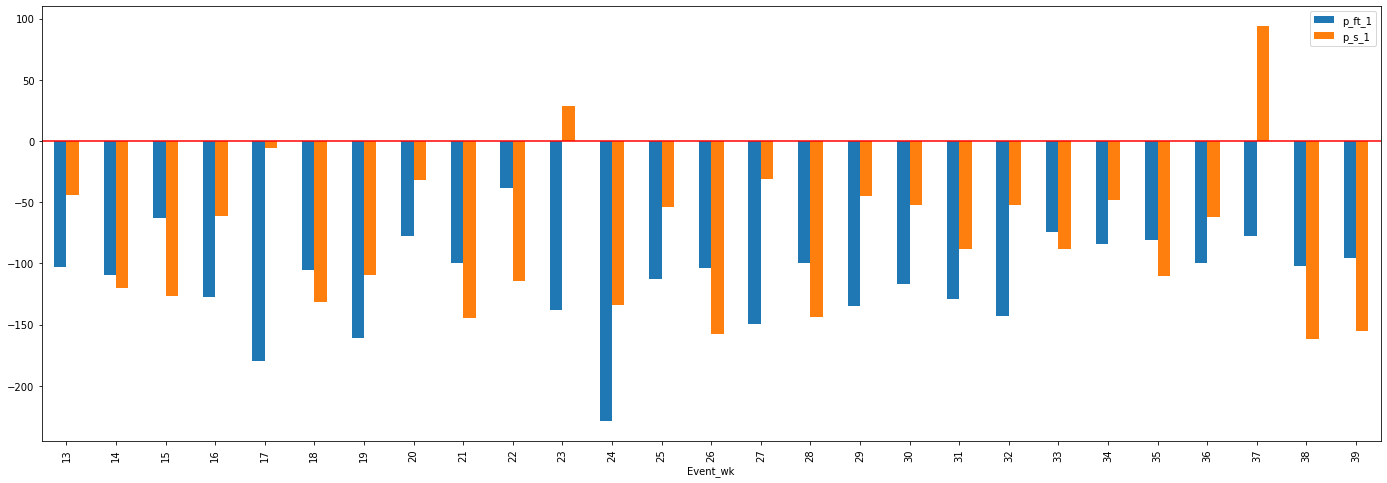

In [44]:

plt = df_plot.plot(x= rupvar[0], y=['p_ft_1','p_s_1'], figsize = (24,8), kind= 'bar')
plt.axhline(y=0, color='r', linestyle='-')


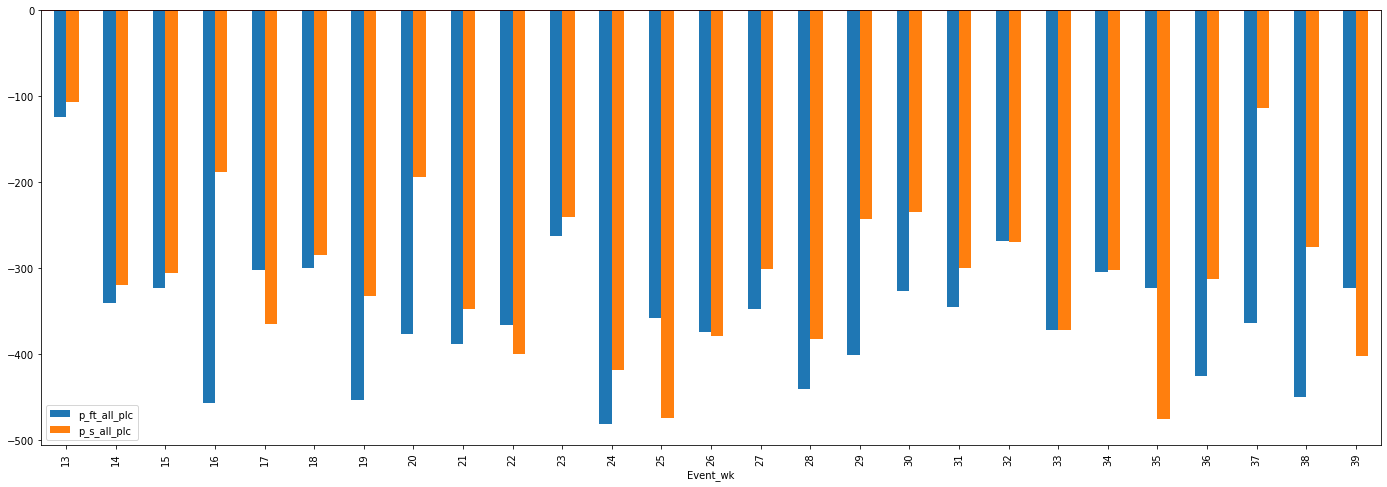

In [45]:

plt = df_plot.plot(x= rupvar[0], y=['p_ft_all_plc','p_s_all_plc'], figsize = (24,8), kind= 'bar')
plt.axhline(y=0, color='r', linestyle='-')


#### Export the files 

In [46]:

# Classic overestimation of Placement problems -- placing top 3 for 8, and also 3 for 7,6,5,4,3,2,1 racers (fix)
# Classic using WIN price for PLACE issue

df_eval = df_eval_v2.groupby(['preds_tie','ttflag'])\
.agg({'ft_1':'sum', 'h_ft_1':'sum', 'p_ft_1':'sum', 'ft_all_plc':'sum', 'h_ft_all_plc':'sum', 'p_ft_all_plc':'sum', 'ft_lay_last':'sum', 'h_ft_lay_last':'sum', 'p_ft_lay_last':'sum' ''\
      , 's_1':'sum', 'h_s_1':'sum', 'p_s_1' :'sum' ,'s_all_plc':'sum', 'h_s_all_plc':'sum', 'p_s_all_plc':'sum', 's_lay_last':'sum', 'h_s_lay_last':'sum', 'p_s_lay_last':'sum'\
      , 'rand_1':'sum', 'h_rand_1':'sum', 'p_rand_1' :'sum' ,'rand_all_plc':'sum', 'h_rand_all_plc':'sum', 'p_rand_all_plc':'sum', 'rand_lay_last':'sum', 'h_rand_lay_last':'sum', 'p_rand_lay_last':'sum'\
      ,'@id_RACE':'nunique' })\
.reset_index()\
.transpose()


In [47]:

df_eval


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
preds_tie,0,0,1,1,2,2,3,3,4,4,5,5,6,6,7,7
ttflag,Test,Train,Test,Train,Test,Train,Test,Train,Test,Train,Test,Train,Test,Train,Test,Train
ft_1,21235,49996,651,2199,332,1094,168,594,72,356,34,268,4,216,2,254
h_ft_1,8696,20268,250,872,126,442,80,234,24,141,10,106,2,81,0,96
p_ft_1,-2867.05,-7133.49,-94,-292.31,-54.82,-132.3,10.61,-69.36,-13.4,-50.35,-15.15,-36.67,-0.8,-42.05,-2,-24.29
ft_all_plc,53896,126265,1655,5534,808,2813,431,1568,195,930,90,671,12,512,6,777
h_ft_all_plc,14874,34840,442,1528,206,790,124,395,49,241,23,181,4,149,1,202
p_ft_all_plc,-9033.4,-20389.6,-301.85,-836.66,-176.42,-319.75,-60.09,-326.36,-12.2,-192.05,-20.45,-119.57,-0.1,-42.55,-0.5,-52.54
ft_lay_last,15330,36468,448,1563,209,764,131,413,53,266,28,194,3,154,1,181
h_ft_lay_last,15052,35737,435,1530,207,749,126,401,52,260,28,189,3,150,1,178


In [48]:

#df_eval.to_csv(f'{fileloc}/evaluation_2022-10-18_extended_totals.csv', index = True)
#df_eval.to_csv(f'{fileloc}/evaluation_2022-10-27_extended_totals.csv', index = True)
df_eval.to_csv(f'{fileloc}/evaluation_2022-11-27_extended_totals_{mid}.csv', index = True)


In [49]:

df_res = df_eval_v2.groupby(['preds_tie','ttflag','Track','RaceGrade_H1'])\
.agg({'ft_1':'sum', 'h_ft_1':'sum', 'p_ft_1':'sum', 'ft_all_plc':'sum', 'h_ft_all_plc':'sum', 'p_ft_all_plc':'sum'\
      , 's_1':'sum', 'h_s_1':'sum', 'p_s_1' :'sum' ,'s_all_plc':'sum', 'h_s_all_plc':'sum', 'p_s_all_plc':'sum'\
      , 'rand_1':'sum', 'h_rand_1':'sum', 'p_rand_1' :'sum' ,'rand_all_plc':'sum', 'h_rand_all_plc':'sum', 'p_rand_all_plc':'sum'\
      ,'@id_RACE':'nunique' })\
.reset_index()


In [50]:

df_res


,preds_tie,ttflag,Track,RaceGrade_H1,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,s_1,h_s_1,p_s_1,s_all_plc,h_s_all_plc,p_s_all_plc,rand_1,h_rand_1,p_rand_1,rand_all_plc,h_rand_all_plc,p_rand_all_plc,@id_RACE
0,0,Test,Albion Park,Grade 4,10,3,-1.40,30,6,-4.40,10,1,-5.00,28,4,-10.60,10,1,-2.50,28,4,-7.70,10
1,0,Test,Albion Park,Grade 5,369,168,-1.98,1019,272,-199.68,366,112,-51.72,974,222,-121.03,366,57,91.80,974,136,-49.45,366
2,0,Test,Albion Park,Heat,57,21,-11.08,149,39,-13.38,55,14,-15.73,144,30,-32.03,55,8,34.20,144,19,4.82,55
3,0,Test,Albion Park,Mixed,131,54,-12.62,344,96,-42.52,128,35,-31.67,332,67,-101.42,128,21,38.80,332,53,35.13,128
4,0,Test,Albion Park,Other,291,117,-28.61,798,208,-138.76,281,76,-64.98,741,171,-120.11,281,41,-10.07,741,105,-125.93,281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,7,Train,Warrnambool,Other,2,0,-2.00,6,1,-3.00,16,2,34.90,16,2,34.90,2,0,-2.00,6,1,41.90,2
2172,7,Train,Warrnambool,Restricted,1,1,1.60,3,1,-0.40,8,1,-5.40,8,1,-5.40,1,0,-1.00,3,1,-0.40,1
2173,7,Train,Wauchope,Grade 5,2,0,-2.00,6,2,2.50,16,2,-7.50,16,2,-7.50,2,0,-2.00,6,1,-2.50,2
2174,7,Train,Wauchope,Other,2,0,-2.00,6,1,-1.40,16,3,11.60,16,3,11.60,2,0,-2.00,6,0,-6.00,2


In [51]:

#df_res.to_csv(f'{fileloc}/evaluation_2022-10-18_extended_bytrack.csv', index = True)
#df_res.to_csv(f'{fileloc}/evaluation_2022-10-27_extended_bytrack.csv', index = True)
df_res.to_csv(f'{fileloc}/evaluation_2022-11-27_extended_bytrack_{mid}.csv', index = True)


In [52]:

print("THE END")


THE END
